In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

#### You are provided with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. 

##### The types of toxicity are:

toxic

severe_toxic

obscene

threat

insult

identity_hate

#### You must create a model which predicts a probability of each type of toxicity for each comment.

##### File descriptions

train.csv - the training set, contains comments with their binary labels

test.csv - the test set, you must predict the toxicity probabilities for these comments. To deter hand labeling, the test set contains some comments which are not included in scoring.

sample_submission.csv - a sample submission file in the correct format

test_labels.csv - labels for the test data; value of -1 indicates it was not used for scoring; (Note: file added after competition close!)

In [2]:
df = pd.read_csv('/Users/felipesantos/Desktop/BootcampNY/TreeProject/Toxic Comment Classification Challenge/train.csv')

In [3]:
df.shape

(159571, 8)

In [4]:
df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
100103,17cb79c13491ecd4,It was copied directly from the website. I hav...,0,0,0,0,0,0
110668,4ffff3f4bac51ec2,I'm sorry you feel that way - the idea is simp...,0,0,0,0,0,0
59961,a0822b1d56b54015,"""\nMacedonia has nothing to do with the articl...",0,0,0,0,0,0
58433,9c7abe1474bab505,Sarah Palin's family \n\nWhy (or for that matt...,0,0,0,0,0,0
34904,5d3a5b5b79a2d81d,I just saw you redacting per this request. Fei...,0,0,0,0,0,0
100424,199cfaa56b34ef74,JackofOz|JackofOz]] sums up my feeling about i...,0,0,0,0,0,0
93880,fb064a6df316fdf7,Mark 5 variant?\nDoes anyone have information ...,0,0,0,0,0,0
79027,d37ee2a3d55cac06,". Plus I not a friggin smart dude, so I cant u...",1,0,0,0,0,0
110610,4fb541e7858942c3,I did not make the changes you claim. There a...,0,0,0,0,0,0
92598,f7a400c0eda44b97,"Well that's the thing, we can't include anythi...",0,0,0,0,0,0


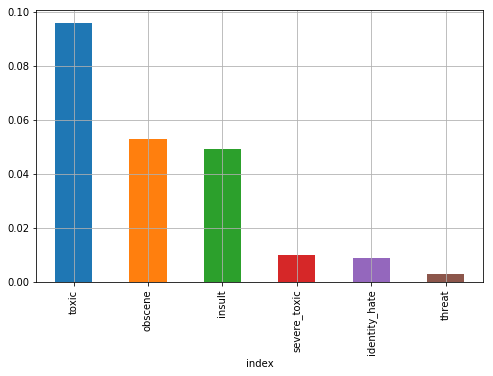

In [5]:
pd.DataFrame([df.toxic.mean(), 
              df.severe_toxic.mean(), 
              df.obscene.mean(), 
              df.threat.mean(),
              df.identity_hate.mean(), 
              df.insult.mean()], 
             index=['toxic','severe_toxic','obscene','threat','identity_hate','insult'], 
            columns=['happening']).sort_values('happening', ascending=False).reset_index().plot(x='index',
                                                                                                y='happening', 
                                                                                                kind='bar', 
                                                                                                legend=False, 
                                                                                                grid=True, 
                                                                                                figsize=(8, 5))

In [6]:
df.sample()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
4618,0c3dff4d5928a933,Who cares anymore. They attack with impunity.,0,0,0,0,0,0


In [7]:
#df['new_label'] = [str(a)+str(b)+str(c)+str(d)+str(e)+str(f)  for a,b,c,d,e,f in zip 
#                   (df.toxic,df.severe_toxic,df.obscene,df.threat,df.insult,df.identity_hate)]

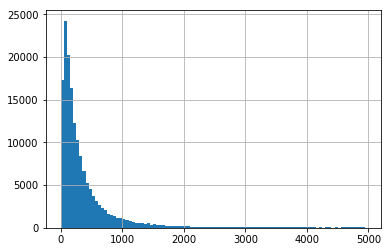

In [8]:
lens = df.comment_text.str.len()
lens.hist(bins = np.arange(0,5000,50))

In [9]:
#   Missing
df['comment_text'].isnull().sum()

0

In [10]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [11]:
df.comment_text = [clean_text(text) for text in df.comment_text]

# Stemmer

In [12]:
# passos = 159571
# aux = pd.DataFrame(list(range(passos)), columns=['i'])
# aux['i'] =aux['i']*df.shape[0]/passos
# aux['i'] = [int(i) for i in aux['i']]
# j = list(aux.i)[1:] 
# j.append(train.shape[0])
# aux['j'] = j

In [13]:
# aux_= pd.DataFrame([])
# aux_train = pd.DataFrame([])
# for w in range(aux.shape[0]):
#     aux_ = df[['comment_text']].loc[range(aux.loc[w].i,aux.loc[w].j)].copy()
#     try:
#         aux_['comment_text_stemmer'] = [' '.join([stemmer.stem(word) for word in word_.split()]) for 
#                                         word_ in aux_['comment_text']]
#     except :
#         aux_['comment_text_stemmer'] =  aux_['comment_text']
    
#     aux_train = pd.concat([aux_train,aux_])
#     print(w)

In [14]:
#aux_train.to_csv('/Users/felipesantos/Desktop/BootcampNY/TreeProject/comment_text_stemmer_2.csv',sep=';')

In [15]:
aux_ = pd.read_csv('/Users/felipesantos/Desktop/BootcampNY/TreeProject/comment_text_stemmer_2.csv',sep=';')

In [16]:
aux_.head()

,Unnamed: 0,comment_text,comment_text_stemmer
0,0,explanation why the edits made under my userna...,explan whi the edit made under my usernam hard...
1,1,d aww he matches this background colour i am s...,d aww he match thi background colour i am seem...
2,2,hey man i am really not trying to edit war it ...,hey man i am realli not tri to edit war it jus...
3,3,more i can not make any real suggestions on im...,more i can not make ani real suggest on improv...
4,4,you sir are my hero any chance you remember wh...,you sir are my hero ani chanc you rememb what ...


In [17]:
aux_.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
aux_.shape

(159571, 2)

In [19]:
aux_.drop_duplicates(subset=['comment_text'], inplace=True)

In [20]:
df.drop_duplicates(subset=['comment_text'], inplace=True)

In [21]:
df = pd.merge(df, aux_, on='comment_text',how='right')

In [22]:
df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_stemmer
86942,e95c7d0d34ea25f0,indians or brittish was the division made up o...,0,0,0,0,0,0,indian or brittish wa the divis made up of bri...
10020,1a8c9b66bddf46c5,glad you have had pleasure from st dildo brian...,0,0,0,0,0,0,glad you have had pleasur from st dildo brian ...
79852,d648ee5f05a77bb4,hey dr grossan good to see you again i sure ha...,0,0,0,0,0,0,hey dr grossan good to see you again i sure ha...
23833,3f004f1df3b0eb0e,article collaboration proposal at wikiproject ...,0,0,0,0,0,0,articl collabor propos at wikiproject space co...
47401,7eec99fec3c25a0f,listcruft can you nominate this article for de...,0,0,0,0,0,0,listcruft can you nomin thi articl for delet h...


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.multiclass import OneVsRestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
import itertools
import xgboost as xgb

### Split Train-Test

In [24]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train.comment_text_stemmer
X_test = test.comment_text_stemmer
print(X_train.shape)
print(X_test.shape)

(106372,)
(52393,)


In [25]:
pd.DataFrame([df.toxic.mean(), 
              df.severe_toxic.mean(), 
              df.obscene.mean(), 
              df.threat.mean(),
              df.identity_hate.mean(), 
              df.insult.mean()], 
             index=['toxic','severe_toxic','obscene','threat','identity_hate','insult'], 
            columns=['happening']).sort_values('happening', ascending=False).reset_index()

,index,happening
0,toxic,0.095676
1,obscene,0.052858
2,insult,0.049280
3,severe_toxic,0.009977
4,identity_hate,0.008768
5,threat,0.002948


In [27]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from bayes_opt import BayesianOptimization
from sklearn.metrics import confusion_matrix

### AdaBoostClassifier

In [135]:
%%time
dict_AdaBoostClassifier = {}
dict_AdaBoostClassifier['toxic'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['severe_toxic'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['obscene'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['threat'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['insult'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['identity_hate'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(loss='exponential',
                                                                                n_estimators= dict_AdaBoostClassifier[category]['n_estimators'],
                                                                                max_depth= dict_AdaBoostClassifier[category]['max_depth'],
                                                                                learning_rate= dict_AdaBoostClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9486190903364954
[[47119   192]
 [ 2500  2582]]
... Processing severe_toxic
Test accuracy is 0.9905330864810185
[[51790    74]
 [  422   107]]
... Processing obscene
Test accuracy is 0.9746149294753116
[[49460   131]
 [ 1199  1603]]
... Processing threat
Test accuracy is 0.9970988490828927
[[52230     7]
 [  145    11]]
... Processing insult
Test accuracy is 0.9665604183765006
[[49607   207]
 [ 1545  1034]]
... Processing identity_hate
Test accuracy is 0.9913538068062527
[[51863    32]
 [  421    77]]
CPU times: user 1h 20min 37s, sys: 39.3 s, total: 1h 21min 17s
Wall time: 1h 21min 52s


In [ ]:
%%time
dict_AdaBoostClassifier = {}
dict_AdaBoostClassifier['toxic'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['severe_toxic'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['obscene'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['threat'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['insult'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['identity_hate'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(loss='exponential',
                                                                                n_estimators= dict_AdaBoostClassifier[category]['n_estimators'],
                                                                                max_depth= dict_AdaBoostClassifier[category]['max_depth'],
                                                                                learning_rate= dict_AdaBoostClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.950260530986964
[[47083   228]
 [ 2378  2704]]
... Processing severe_toxic
Test accuracy is 0.9905521730002099
[[51774    90]
 [  405   124]]
... Processing obscene
Test accuracy is 0.9752638711278224
[[49458   133]
 [ 1163  1639]]
... Processing threat
Test accuracy is 0.9971179356020843
[[52228     9]
 [  142    14]]
... Processing insult
Test accuracy is 0.9676292634512244
[[49571   243]
 [ 1453  1126]]
... Processing identity_hate
Test accuracy is 0.9914683259214017
[[51852    43]
 [  404    94]]
CPU times: user 2h 8min 53s, sys: 1min, total: 2h 9min 54s
Wall time: 2h 10min 53s


In [132]:
dict_AdaBoostClassifier = {}
dict_AdaBoostClassifier['toxic'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['severe_toxic'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['obscene'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['threat'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['insult'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_AdaBoostClassifier['identity_hate'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(loss='exponential',
                                                                                n_estimators= dict_AdaBoostClassifier[category]['n_estimators'],
                                                                                max_depth= dict_AdaBoostClassifier[category]['max_depth'],
                                                                                learning_rate= dict_AdaBoostClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9510430782738152
[[47078   233]
 [ 2332  2750]]
... Processing severe_toxic
Test accuracy is 0.9905330864810185
[[51768    96]
 [  400   129]]
... Processing obscene
Test accuracy is 0.9761991105682056
[[49447   144]
 [ 1103  1699]]
... Processing threat
Test accuracy is 0.9970797625637012
[[52223    14]
 [  139    17]]
... Processing insult
Test accuracy is 0.9682972916229268
[[49564   250]
 [ 1411  1168]]
... Processing identity_hate
Test accuracy is 0.9915828450365507
[[51850    45]
 [  396   102]]


### GradientBoostingClassifier

In [28]:
%%time
dict_GradientBoostingClassifier = {}
dict_GradientBoostingClassifier['toxic'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['severe_toxic'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['obscene'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['threat'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['insult'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['identity_hate'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(n_estimators= dict_GradientBoostingClassifier[category]['n_estimators'],
                                                                                max_depth= dict_GradientBoostingClassifier[category]['max_depth'],
                                                                                learning_rate= dict_GradientBoostingClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9543832191323268
[[46811   500]
 [ 1890  3192]]
... Processing severe_toxic
Test accuracy is 0.9898077987517416
[[51768    96]
 [  438    91]]
... Processing obscene
Test accuracy is 0.9783558872368446
[[49205   386]
 [  748  2054]]
... Processing threat
Test accuracy is 0.9969079838909778
[[52210    27]
 [  135    21]]
... Processing insult
Test accuracy is 0.9684308972572672
[[49288   526]
 [ 1128  1451]]
... Processing identity_hate
Test accuracy is 0.9904758269234439
[[51868    27]
 [  472    26]]
CPU times: user 1h 34min 15s, sys: 28.1 s, total: 1h 34min 43s
Wall time: 1h 35min 26s


In [29]:
%%time
dict_GradientBoostingClassifier = {}
dict_GradientBoostingClassifier['toxic'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['severe_toxic'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['obscene'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['threat'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['insult'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['identity_hate'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(n_estimators= dict_GradientBoostingClassifier[category]['n_estimators'],
                                                                                max_depth= dict_GradientBoostingClassifier[category]['max_depth'],
                                                                                learning_rate= dict_GradientBoostingClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9532571145000286
[[46741   570]
 [ 1879  3203]]
... Processing severe_toxic
Test accuracy is 0.9898077987517416
[[51769    95]
 [  439    90]]
... Processing obscene
Test accuracy is 0.9782604546408872
[[49198   393]
 [  746  2056]]
... Processing threat
Test accuracy is 0.9967743782566373
[[52209    28]
 [  141    15]]
... Processing insult
Test accuracy is 0.9674574847785009
[[49253   561]
 [ 1144  1435]]
... Processing identity_hate
Test accuracy is 0.9904567404042525
[[51866    29]
 [  471    27]]
CPU times: user 2h 32min 27s, sys: 50.4 s, total: 2h 33min 17s
Wall time: 2h 34min 37s


In [30]:
%%time
dict_GradientBoostingClassifier = {}
dict_GradientBoostingClassifier['toxic'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['severe_toxic'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['obscene'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['threat'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['insult'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_GradientBoostingClassifier['identity_hate'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(n_estimators= dict_GradientBoostingClassifier[category]['n_estimators'],
                                                                                max_depth= dict_GradientBoostingClassifier[category]['max_depth'],
                                                                                learning_rate= dict_GradientBoostingClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9537533639990075
[[46713   598]
 [ 1825  3257]]
... Processing severe_toxic
Test accuracy is 0.9897696257133587
[[51767    97]
 [  439    90]]
... Processing obscene
Test accuracy is 0.9784131467944192
[[49213   378]
 [  753  2049]]
... Processing threat
Test accuracy is 0.9967743782566373
[[52209    28]
 [  141    15]]
... Processing insult
Test accuracy is 0.9679919073158628
[[49251   563]
 [ 1114  1465]]
... Processing identity_hate
Test accuracy is 0.9904567404042525
[[51867    28]
 [  472    26]]
CPU times: user 3h 7min 57s, sys: 1min 4s, total: 3h 9min 1s
Wall time: 3h 10min 37s


### XGBClassifier

In [31]:
%%time
dict_XGBClassifier = {}
dict_XGBClassifier['toxic'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['severe_toxic'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['obscene'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['threat'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['insult'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['identity_hate'] = {'n_estimators': 500,'max_depth': 3, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(xgb.XGBClassifier(n_estimators= dict_XGBClassifier[category]['n_estimators'],
                                                                       max_depth= dict_XGBClassifier[category]['max_depth'],
                                                                       learning_rate= dict_XGBClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9569789857423702
[[46975   336]
 [ 1918  3164]]
... Processing severe_toxic
Test accuracy is 0.9902277021739545
[[51756   108]
 [  404   125]]
... Processing obscene
Test accuracy is 0.9805508369438666
[[49339   252]
 [  767  2035]]
... Processing threat
Test accuracy is 0.9970988490828927
[[52207    30]
 [  122    34]]
... Processing insult
Test accuracy is 0.971083923424885
[[49405   409]
 [ 1106  1473]]
... Processing identity_hate
Test accuracy is 0.9919073158628061
[[51829    66]
 [  358   140]]
CPU times: user 31min 12s, sys: 10.8 s, total: 31min 22s
Wall time: 31min 38s


In [32]:
%%time
dict_XGBClassifier = {}
dict_XGBClassifier['toxic'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['severe_toxic'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['obscene'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['threat'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['insult'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['identity_hate'] = {'n_estimators': 800,'max_depth': 3, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(xgb.XGBClassifier(n_estimators= dict_XGBClassifier[category]['n_estimators'],
                                                                       max_depth= dict_XGBClassifier[category]['max_depth'],
                                                                       learning_rate= dict_XGBClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.957856965625179
[[46926   385]
 [ 1823  3259]]
... Processing severe_toxic
Test accuracy is 0.9902277021739545
[[51745   119]
 [  393   136]]
... Processing obscene
Test accuracy is 0.9802645391559941
[[49320   271]
 [  763  2039]]
... Processing threat
Test accuracy is 0.9970797625637012
[[52204    33]
 [  120    36]]
... Processing insult
Test accuracy is 0.9714847403279064
[[49388   426]
 [ 1068  1511]]
... Processing identity_hate
Test accuracy is 0.9917355371900827
[[51822    73]
 [  360   138]]
CPU times: user 48min 31s, sys: 15.4 s, total: 48min 47s
Wall time: 49min 12s


In [33]:
%%time
dict_XGBClassifier = {}
dict_XGBClassifier['toxic'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['severe_toxic'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['obscene'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['threat'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['insult'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}
dict_XGBClassifier['identity_hate'] = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(xgb.XGBClassifier(n_estimators= dict_XGBClassifier[category]['n_estimators'],
                                                                       max_depth= dict_XGBClassifier[category]['max_depth'],
                                                                       learning_rate= dict_XGBClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9583723016433493
[[46909   402]
 [ 1779  3303]]
... Processing severe_toxic
Test accuracy is 0.9901895291355716
[[51738   126]
 [  388   141]]
... Processing obscene
Test accuracy is 0.9802454526368026
[[49310   281]
 [  754  2048]]
... Processing threat
Test accuracy is 0.9970606760445098
[[52203    34]
 [  120    36]]
... Processing insult
Test accuracy is 0.9713702212127574
[[49385   429]
 [ 1071  1508]]
... Processing identity_hate
Test accuracy is 0.9917546237092741
[[51821    74]
 [  358   140]]
CPU times: user 59min 41s, sys: 18.2 s, total: 59min 59s
Wall time: 1h 28s


### Just Toxic

In [36]:
categories = ['toxic']

In [40]:
%%time
dict_XGBClassifier = {}
dict_XGBClassifier['toxic'] = {'n_estimators': 500,'max_depth': 5, 'learning_rate': 0.2}

for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(xgb.XGBClassifier(n_estimators= dict_XGBClassifier[category]['n_estimators'],
                                                                       max_depth= dict_XGBClassifier[category]['max_depth'],
                                                                       learning_rate= dict_XGBClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.957704273471647
[[46889   422]
 [ 1794  3288]]
CPU times: user 9min 20s, sys: 3.33 s, total: 9min 23s
Wall time: 9min 30s


In [41]:
%%time
dict_XGBClassifier = {}
dict_XGBClassifier['toxic'] = {'n_estimators': 800,'max_depth': 5, 'learning_rate': 0.2}

for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(xgb.XGBClassifier(n_estimators= dict_XGBClassifier[category]['n_estimators'],
                                                                       max_depth= dict_XGBClassifier[category]['max_depth'],
                                                                       learning_rate= dict_XGBClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9581050903746684
[[46861   450]
 [ 1745  3337]]
CPU times: user 14min 37s, sys: 4.15 s, total: 14min 41s
Wall time: 14min 47s


In [42]:
%%time
dict_XGBClassifier = {}
dict_XGBClassifier['toxic'] = {'n_estimators': 1000,'max_depth': 5, 'learning_rate': 0.2}

for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(xgb.XGBClassifier(n_estimators= dict_XGBClassifier[category]['n_estimators'],
                                                                       max_depth= dict_XGBClassifier[category]['max_depth'],
                                                                       learning_rate= dict_XGBClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9582386960090088
[[46837   474]
 [ 1714  3368]]
CPU times: user 18min 4s, sys: 3.89 s, total: 18min 8s
Wall time: 18min 12s


In [43]:
%%time
dict_GradientBoostingClassifier = {}
dict_GradientBoostingClassifier['toxic'] = {'n_estimators': 500,'max_depth': 5, 'learning_rate': 0.2}

for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(n_estimators= dict_GradientBoostingClassifier[category]['n_estimators'],
                                                                                max_depth= dict_GradientBoostingClassifier[category]['max_depth'],
                                                                                learning_rate= dict_GradientBoostingClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9532952875384116
[[46647   664]
 [ 1783  3299]]
CPU times: user 27min 10s, sys: 6.58 s, total: 27min 16s
Wall time: 27min 24s


In [44]:
%%time
dict_GradientBoostingClassifier = {}
dict_GradientBoostingClassifier['toxic'] = {'n_estimators': 800,'max_depth': 5, 'learning_rate': 0.2}

for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(n_estimators= dict_GradientBoostingClassifier[category]['n_estimators'],
                                                                                max_depth= dict_GradientBoostingClassifier[category]['max_depth'],
                                                                                learning_rate= dict_GradientBoostingClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.95199740423339
[[46571   740]
 [ 1775  3307]]
CPU times: user 41min 19s, sys: 11.9 s, total: 41min 31s
Wall time: 42min


In [27]:
%%time
dict_GradientBoostingClassifier = {}
dict_GradientBoostingClassifier['toxic'] = {'n_estimators': 1000,'max_depth': 5, 'learning_rate': 0.2}

for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(n_estimators= dict_GradientBoostingClassifier[category]['n_estimators'],
                                                                                max_depth= dict_GradientBoostingClassifier[category]['max_depth'],
                                                                                learning_rate= dict_GradientBoostingClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9525890863283263
[[46590   721]
 [ 1763  3319]]


KeyError: 'severe_toxic'

In [28]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
categories = ['toxic']


train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train.comment_text_stemmer
X_test = test.comment_text_stemmer
print(X_train.shape)
print(X_test.shape)

(106372,)
(52393,)


### AdaBoostClassifier

In [29]:
%%time
dict_AdaBoostClassifier = {}
dict_AdaBoostClassifier['toxic'] = {'n_estimators': 500,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['severe_toxic'] = {'n_estimators': 500,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['obscene'] = {'n_estimators': 500,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['threat'] = {'n_estimators': 500,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['insult'] = {'n_estimators': 500,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['identity_hate'] = {'n_estimators': 500,'max_depth': 5, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(loss='exponential',
                                                                                n_estimators= dict_AdaBoostClassifier[category]['n_estimators'],
                                                                                max_depth= dict_AdaBoostClassifier[category]['max_depth'],
                                                                                learning_rate= dict_AdaBoostClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9509476456778577
[[47088   223]
 [ 2347  2735]]
CPU times: user 41min 9s, sys: 15.1 s, total: 41min 25s
Wall time: 57min 13s


In [30]:
%%time
dict_AdaBoostClassifier = {}
dict_AdaBoostClassifier['toxic'] = {'n_estimators': 800,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['severe_toxic'] = {'n_estimators': 800,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['obscene'] = {'n_estimators': 800,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['threat'] = {'n_estimators': 800,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['insult'] = {'n_estimators': 800,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['identity_hate'] = {'n_estimators': 800,'max_depth': 5, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(loss='exponential',
                                                                                n_estimators= dict_AdaBoostClassifier[category]['n_estimators'],
                                                                                max_depth= dict_AdaBoostClassifier[category]['max_depth'],
                                                                                learning_rate= dict_AdaBoostClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9525127402515603
[[47037   274]
 [ 2214  2868]]
CPU times: user 1h 5min 23s, sys: 24.1 s, total: 1h 5min 47s
Wall time: 1h 31min 8s


In [31]:
dict_AdaBoostClassifier = {}
dict_AdaBoostClassifier['toxic'] = {'n_estimators': 1000,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['severe_toxic'] = {'n_estimators': 1000,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['obscene'] = {'n_estimators': 1000,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['threat'] = {'n_estimators': 1000,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['insult'] = {'n_estimators': 1000,'max_depth': 5, 'learning_rate': 0.2}
dict_AdaBoostClassifier['identity_hate'] = {'n_estimators': 1000,'max_depth': 5, 'learning_rate': 0.2}


for category in categories:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words,ngram_range=(1,1))),
                         ('clf', OneVsRestClassifier(GradientBoostingClassifier(loss='exponential',
                                                                                n_estimators= dict_AdaBoostClassifier[category]['n_estimators'],
                                                                                max_depth= dict_AdaBoostClassifier[category]['max_depth'],
                                                                                learning_rate= dict_AdaBoostClassifier[category]['learning_rate'])))])
    print('... Processing {}'.format(category))
    pipeline.fit(X_train, train[category])
    prediction = pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print(confusion_matrix(test[category], prediction))

... Processing toxic
Test accuracy is 0.9541732674212204
[[47041   270]
 [ 2131  2951]]


### Grid Search

In [32]:
np.linspace(start=7, stop=9, num=3, dtype=int)

array([7, 8, 9])

In [61]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
categories = ['toxic']


train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train.comment_text_stemmer
X_test = test.comment_text_stemmer
print(X_train.shape)
print(X_test.shape)

(106372,)
(52393,)


In [62]:
max_depth = [4,8]
learning_rate= [0.05, 0.8]
n_estimators= [300, 600, 900]
subsample= [0.5, 1.0]
colsample_bylevel= [0.33]
colsample_bytree= [0.5]
reg_alpha= [0.15]
reg_lambda= [0.15]

params = list(itertools.product(max_depth, 
                                learning_rate,
                                n_estimators,
                                subsample, 
                                colsample_bylevel, 
                                colsample_bytree,
                                reg_alpha,
                                reg_lambda))

In [73]:
len(params)

24

In [63]:
df_result = pd.DataFrame([])
for i in range(len(params)):
    print(i)
    tree_ = xgb.XGBClassifier(max_depth = params[i][0],
                              learning_rate = params[i][1], 
                              n_estimators = params[i][2], 
                              subsample = params[i][3], 
                              colsample_bylevel = params[i][4],
                              colsample_bytree = params[i][5],
                              reg_alpha = params[i][6],
                              reg_lambda = params[i][7])
    
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                          ('clf', OneVsRestClassifier(tree_))])
    for category in categories:
        print('... Processing {}'.format(category))
        print(params[i])
        list_aux = []
        list_aux.append(params[i])
        list_aux.append(category)
        pipeline.fit(X_train, train[category])
        prediction = pipeline.predict(X_test)
        score = accuracy_score(test[category], prediction)
        list_aux.append(score)
        print(score)
        df_result = df_result.append([pd.DataFrame([list_aux])])
        %time 

0
... Processing toxic
(4, 0.05, 300, 0.5, 0.33, 0.5, 0.15, 0.15)
0.9473212070314737
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs
1
... Processing toxic
(4, 0.05, 300, 1.0, 0.33, 0.5, 0.15, 0.15)
0.9467104384173458
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11 µs
2
... Processing toxic
(4, 0.05, 600, 0.5, 0.33, 0.5, 0.15, 0.15)
0.9531616819040711
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.78 µs
3
... Processing toxic
(4, 0.05, 600, 1.0, 0.33, 0.5, 0.15, 0.15)
0.9525127402515603
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
4
... Processing toxic
(4, 0.05, 900, 0.5, 0.33, 0.5, 0.15, 0.15)
0.9557956215524974
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs
5
... Processing toxic
(4, 0.05, 900, 1.0, 0.33, 0.5, 0.15, 0.15)
0.9549176416696887
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
6
... Processing toxic
(4, 0.8, 300, 0.5, 0.33, 0.5, 0.15, 0.15)
0.9490389937587083
CPU times: use

In [71]:
df_result

,0,1,2
0,"(4, 0.05, 300, 0.5, 0.33, 0.5, 0.15, 0.15)",toxic,0.947321
0,"(4, 0.05, 300, 1.0, 0.33, 0.5, 0.15, 0.15)",toxic,0.946710
0,"(4, 0.05, 600, 0.5, 0.33, 0.5, 0.15, 0.15)",toxic,0.953162
0,"(4, 0.05, 600, 1.0, 0.33, 0.5, 0.15, 0.15)",toxic,0.952513
0,"(4, 0.05, 900, 0.5, 0.33, 0.5, 0.15, 0.15)",toxic,0.955796
0,"(4, 0.05, 900, 1.0, 0.33, 0.5, 0.15, 0.15)",toxic,0.954918
0,"(4, 0.8, 300, 0.5, 0.33, 0.5, 0.15, 0.15)",toxic,0.949039
0,"(4, 0.8, 300, 1.0, 0.33, 0.5, 0.15, 0.15)",toxic,0.954402
0,"(4, 0.8, 600, 0.5, 0.33, 0.5, 0.15, 0.15)",toxic,0.949497
0,"(4, 0.8, 600, 1.0, 0.33, 0.5, 0.15, 0.15)",toxic,0.954937


In [70]:
df_result[df_result[2] == df_result[2].max()]

,0,1,2
0,"(8, 0.05, 900, 0.5, 0.33, 0.5, 0.15, 0.15)",toxic,0.958239


In [87]:
df_result_1 = df_result.copy()

In [94]:
categories = ['toxic']


train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train.comment_text_stemmer
X_test = test.comment_text_stemmer
print(X_train.shape)
print(X_test.shape)

(106372,)
(52393,)


In [124]:
list(np.linspace(start=2000, stop=15000, num=10, dtype=int))

[2000, 3444, 4888, 6333, 7777, 9222, 10666, 12111, 13555, 15000]

In [125]:
max_depth = [8]
learning_rate= [0.05]
n_estimators= list(np.linspace(start=2000, stop=15000, num=10, dtype=int))
subsample= [0.5]
colsample_bylevel= [0.33]
colsample_bytree= [0.5]
reg_alpha= [0.15]
reg_lambda= [0.15]

params = list(itertools.product(max_depth, 
                                learning_rate,
                                n_estimators,
                                subsample, 
                                colsample_bylevel, 
                                colsample_bytree,
                                reg_alpha,
                                reg_lambda))

In [126]:
len(params)

10

In [ ]:
df_result = pd.DataFrame([])
for i in range(len(params)):
    print(i)
    tree_ = xgb.XGBClassifier(max_depth = params[i][0],
                              learning_rate = params[i][1], 
                              n_estimators = params[i][2], 
                              subsample = params[i][3], 
                              colsample_bylevel = params[i][4],
                              colsample_bytree = params[i][5],
                              reg_alpha = params[i][6],
                              reg_lambda = params[i][7])
    
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words)),
                          ('clf', OneVsRestClassifier(tree_))])
    for category in categories:
        print('... Processing {}'.format(category))
        print(params[i])
        list_aux = []
        list_aux.append(params[i][2])
        list_aux.append(category)
        pipeline.fit(X_train, train[category])
        prediction = pipeline.predict(X_train)
        score = accuracy_score(train[category], prediction)
        list_aux.append(score)
        print(score)
        prediction = pipeline.predict(X_test)
        score = accuracy_score(test[category], prediction)
        list_aux.append(score)
        print(score)
        df_result = df_result.append([pd.DataFrame([list_aux])])
        %time 

0
... Processing toxic
(8, 0.05, 2000, 0.5, 0.33, 0.5, 0.15, 0.15)
0.9786221938104013
0.9589830702574772
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs
1
... Processing toxic
(8, 0.05, 3444, 0.5, 0.33, 0.5, 0.15, 0.15)
0.9843003797991953
0.9586395129120302
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs
2
... Processing toxic
(8, 0.05, 4888, 0.5, 0.33, 0.5, 0.15, 0.15)
0.9879573571992629
0.9582577825282004
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 12.2 µs
3
... Processing toxic
(8, 0.05, 6333, 0.5, 0.33, 0.5, 0.15, 0.15)
0.9903640055653743
0.9579905712595194
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs
4
... Processing toxic
(8, 0.05, 7777, 0.5, 0.33, 0.5, 0.15, 0.15)


In [ ]:
df_result

In [101]:
df_result_100_1500

,0,1,2,3
0,100,toxic,0.947524,0.944191
0,150,toxic,0.951500,0.947398
0,200,toxic,0.954847,0.949822
0,250,toxic,0.957508,0.952036
0,300,toxic,0.959435,0.953467
0,350,toxic,0.960920,0.954479
0,400,toxic,0.962424,0.955166
0,450,toxic,0.963458,0.955547
0,500,toxic,0.964530,0.956330
0,550,toxic,0.965527,0.956559
